#Understanding filters

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import numpy as np

Text(0.5, 1.0, '2-Dimensional Input Image')

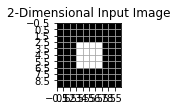

In [2]:
offt=1
offx=1

plt.subplot(3,3,1)
x1=np.zeros((10,10))
x1[3:7,3:7]=1
plt.imshow(x1,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('2-Dimensional Input Image')

In [3]:
import numpy as np
from scipy.ndimage import filters
from PIL import Image
from matplotlib import pyplot as plt
import urllib

In [4]:
import requests

def download_image(img_path, url):
    f = open(img_path,'wb')
    f.write(requests.get(url).content)
    f.close()
    print('Finished downloading images ....')
    return img_path

In [5]:
from PIL import Image
import numpy as np

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data



im = load_image(download_image('rgb_image.jpg','https://www.hdm-stuttgart.de/~maucher/Python/ComputerVision/html/_images/alcatraz1.jpg'))
imx = np.zeros(im.shape,dtype=np.float64)
filters.sobel(im,1,imx)
imy = np.zeros(im.shape,dtype=np.float64)
filters.sobel(im,0,imy)

Finished downloading images ....


array([[[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        ...,
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        ...,
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        ...,
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       ...,

       [[   4.,    4.,    4.],
        [  72.,   72.,   72.],
        [  20.,   20.,   20.],
        ...,
        [ -28.,  -28.,  -28.],
        [-160., -160., -160.],
        [-392., -392., -392.]],

       [[-136., -136., -136.],
        [  76.,   76.,   76.],
        [ 176.,  176.,  176.],
        ...,
        [  12.,   12.,   12.],
        [-240., -240., -240.],
        [-580.,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


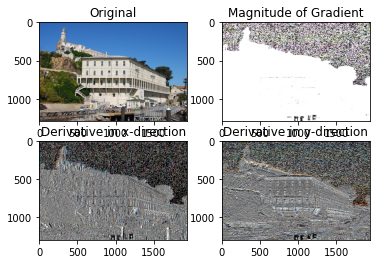

In [6]:
magnitude=np.sqrt(imx**2+imy**2)
plt.subplot(2,2,1)
plt.imshow(im,cmap=plt.cm.gray)
plt.title("Original")
plt.subplot(2,2,2)
plt.imshow(magnitude,cmap=plt.cm.gray)
plt.title("Magnitude of Gradient")
plt.subplot(2,2,3)
plt.imshow(imx,cmap=plt.cm.gray)
plt.title('Derivative in x-direction')
plt.subplot(2,2,4)
plt.title('Derivative in y-direction')
plt.imshow(imy,cmap=plt.cm.gray)
plt.show()

In [7]:
from skimage import data
from skimage.feature import match_template
from skimage.draw import circle
from matplotlib import pyplot as plt
import numpy as np

Finished downloading images ....


Text(0.5, 1.0, 'Search pattern in this image')

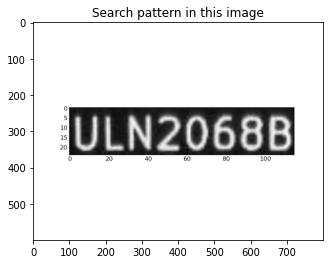

In [8]:
from skimage import color
from skimage import io

full = color.rgb2gray(io.imread(download_image('platine.jpg','https://www.hdm-stuttgart.de/~maucher/Python/ComputerVision/html/_images/template.png')))
plt.imshow(full,cmap = plt.cm.gray)
plt.title("Search pattern in this image")

Text(0.5, 1.0, 'Search pattern in this image')

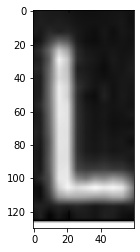

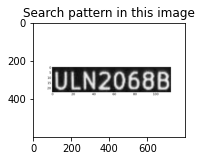

In [9]:

template = full[240:370,190:250]
plt.imshow(template,cmap = plt.cm.gray)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(full,cmap = plt.cm.gray)
plt.title("Search pattern in this image")

238 189 0.9045545921534892
238 190 0.911946684620139
238 191 0.9012636514796697
239 188 0.9326368020242536
239 189 0.9566904274415526
239 190 0.9647683890142216
239 191 0.9550825835091821
239 192 0.9292068178584367
240 187 0.9294006452229375
240 188 0.9669308738489507
240 189 0.9912878900357776
240 190 0.9999999999999978
240 191 0.9912491526477216
240 192 0.9666134956501617
240 193 0.9283907778526256
241 188 0.9278819999365634
241 189 0.9525740886899163
241 190 0.9618734763791625
241 191 0.9540518356023853
241 192 0.9305876665269263
242 190 0.9088857312320497
242 191 0.9019497571231228


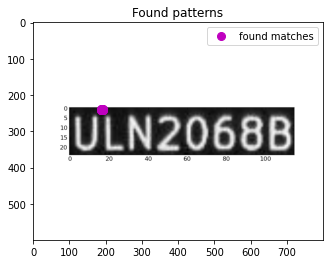

In [14]:
correlation=match_template(full,template)

xcoords=[]
ycoords=[]
for row in range(correlation.shape[0]):
        for col in range(correlation.shape[1]):
                if correlation[row,col]>0.9:
                        print(row,col,correlation[row,col])
                        xcoords.append(col)
                        ycoords.append(row)

plt.imshow(full,cmap = plt.cm.gray)
plt.title("Found patterns")
plt.plot(xcoords,ycoords,'om',ms=8,label="found matches")
plt.legend(loc=2,numpoints=1)
plt.legend()
plt.show()